In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data = pd.merge(ride_data, city_data, how="left", on=["city","city"])

# Display the data table for preview
combine_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#city type
urban_city = combine_data[combine_data['type'] == 'Urban']
suburban_city = combine_data[combine_data['type'] == 'Suburban']
rural_city = combine_data[combine_data['type'] == 'Rural']

In [3]:
#urban data
urban_ride_count = urban_city.groupby(['city']).count()['ride_id']
urban_avg_fare = urban_city.groupby(['city']).mean()['fare']
urban_driver_count = urban_city.groupby(['city']).mean()['driver_count']
                                    

In [4]:
#suburban data
suburban_ride_count = suburban_city.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban_city.groupby(['city']).mean()['fare']
suburban_driver_count = suburban_city.groupby(['city']).mean()['driver_count']
                                    

In [5]:
#rural data
rural_ride_count = rural_city.groupby(['city']).count()['ride_id']
rural_avg_fare = rural_city.groupby(['city']).mean()['fare']
rural_driver_count = rural_city.groupby(['city']).mean()['driver_count']

## Bubble Plot of Ride Sharing Data

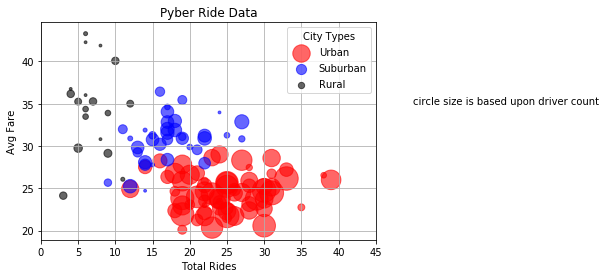

In [6]:


# Build the scatter plots for each city types
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=8*urban_driver_count, c="r",
           linewidths=1, marker="o",
           alpha=.6, label="Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=8*suburban_driver_count, c="b",
           linewidths=1, marker="o",
           alpha=.6, label="Suburban")
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=8*rural_driver_count, c="black",
           linewidths=1, marker="o",
           alpha=.6, label="Rural")
# Incorporate the other graph properties

plt.title("Pyber Ride Data")
plt.ylabel("Avg Fare")
plt.xlabel("Total Rides")
plt.xlim((0,45))
plt.grid(True)

# Create a legend

plt.legend(loc="best", title="City Types", labelspacing=0.6)

# Incorporate a text label regarding circle size
plt.text(50, 35, "circle size is based upon driver count")

# Save Figure

plt.savefig("fig.png")

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

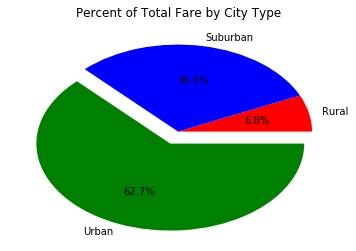

In [8]:
# Calculate Type Percents

percents_fare = 100 * combine_data.groupby(['type']).sum()['fare'] / combine_data['fare'].sum()

# Build Pie Chart

plt.pie(percents_fare,
       labels=['Rural', 'Suburban', 'Urban'],
       colors=['red', 'blue', 'green'],
       explode=[0, 0, 0.15],
       autopct='%1.1f%%')
plt.title('Percent of Total Fare by City Type')
plt.axis=('equal')

# Save Figure

plt.savefig('fig2.png')


In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

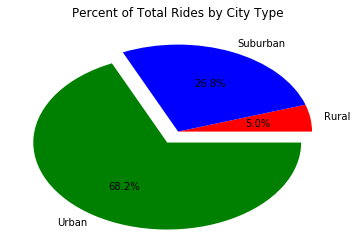

In [10]:
# Calculate Ride Percents
percents_ride = 100 * combine_data.groupby(['type']).sum()['ride_id'] / combine_data['ride_id'].count()

# Build Pie Chart

plt.pie(percents_ride,
       labels=['Rural', 'Suburban', 'Urban'],
       colors=['red', 'blue', 'green'],
       explode=[0, 0, 0.15],
       autopct='%1.1f%%')
plt.title('Percent of Total Rides by City Type')
plt.axis=('equal')

# Save Figure

plt.savefig('fig3.png')
# Build Pie Chart

# Save Figure


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

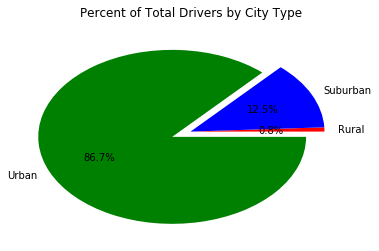

In [12]:
# Calculate Driver Percents
percents_driver = 100 * combine_data.groupby(['type']).sum()['driver_count'] / combine_data['driver_count'].sum()

# Build Pie Chart

plt.pie(percents_driver,
       labels=['Rural', 'Suburban', 'Urban'],
       colors=['red', 'blue', 'green'],
       explode=[0, 0, 0.15],
       autopct='%1.1f%%')
plt.title('Percent of Total Drivers by City Type')
plt.axis=('equal')

# Save Figure

plt.savefig('fig4.png')

In [13]:
# Show Figure
plt.show()